In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
trainData = ImageDataGenerator()
trainingdt = trainData.flow_from_directory(directory='RealvsFake/Training', target_size=(96,96))

Found 101965 images belonging to 2 classes.


In [4]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(96,96))

Found 20076 images belonging to 2 classes.


In [5]:
def preprocess(file_path):
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (96,96))
        img = img / 255.0
        return img

In [6]:
model = Sequential()

pretrained_model= tf.keras.applications.DenseNet201(include_top=False,
                   input_shape= (96,96,3),
                   pooling='max',classes=2,
                   weights='imagenet')

model.add(pretrained_model)

In [7]:

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 18,855,042
Trainable params: 18,625,986
Non-trainable params: 229,056
_________________________________________________________________


In [9]:

model.compile(optimizer=Adam(lr=3e-4),loss = 'hinge',metrics=['acc'])
history = model.fit(trainingdt,validation_data= testingdt,epochs=10,steps_per_epoch=100) 

C:\Users\viola\anaconda3\envs\keras_env\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
100/100 [==============================] - 3021s 29s/step - loss: 0.7047 - acc: 0.7184 - val_loss: 1.3943 - val_acc: 0.5446
Epoch 2/10
100/100 [==============================] - 2620s 26s/step - loss: 0.5617 - acc: 0.7691 - val_loss: 0.8260 - val_acc: 0.6584
Epoch 3/10
100/100 [==============================] - 1583s 16s/step - loss: 0.4814 - acc: 0.7991 - val_loss: 0.5809 - val_acc: 0.7462
Epoch 4/10
100/100 [==============================] - 1194s 12s/step - loss: 0.4615 - acc: 0.8006 - val_loss: 0.8588 - val_acc: 0.6460
Epoch 5/10
100/100 [==============================] - 1196s 12s/step - loss: 0.4557 - acc: 0.8012 - val_loss: 0.6960 - val_acc: 0.6813
Epoch 6/10
100/100 [==============================] - 1196s 12s/step - loss: 0.4502 - acc: 0.8028 - val_loss: 0.7189 - val_acc: 0.7274
Epoch 7/10
100/100 [==============================] - 1196s 12s/step - loss: 0.4439 - acc: 0.8009 - val_loss: 0.4768 - val_acc: 0.7918
Epoch 8/10
100/100 [==============================] - 1

In [10]:
model.save('densenet201linear.h5')

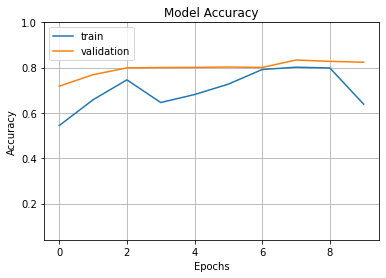

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])

plt.axis(ymin=0.04,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

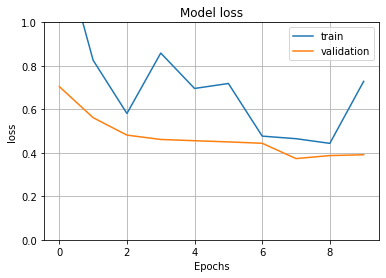

In [15]:
fig1 = plt.gcf()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()